# Manipolare immagini raster con Python

## I formati per la grafica

Quando memorizziamo un'immagine su un file, dobbiamo scegliere in che formato scriverla.

Esistono [decine e decine di formati grafici](https://en.wikipedia.org/wiki/Image_file_format) diversi.

Il formato determina il modo in cui le informazioni contenute nel file vengono memorizzate: ad esempio raster oppure vettoriale, bidimensionale oppure tridimensionale, a layer singolo oppure multiplo. Puoi dare un'occhiata a [queste tabelle comparative](https://en.wikipedia.org/wiki/Comparison_of_graphics_file_formats) su Wikipedia per farti un'idea.

La caratteristica più rilevante nel modo in cui si descrivono le immagini sta nella differenza tra grafica *raster* e grafica *vettoriale*. Possiamo concettualizzare questa differenza guardando i seguenti esempi, i quali mostrano immagini ingrandite a tal punto da poter vedere i loro componenti fondamentali:

![vector-vs-raster_1.jpg](./imgs/graphic/vector-vs-raster_1.jpg)
![vector-vs-raster_2.jpg](./imgs/graphic/vector-vs-raster_2.jpg)

- La grafica *raster* (trama, reticolo, griglia) viene anche detta *bitmap* (mappa di bit), in quanto le immagini vengono rappresentate utilizzando una reticolo (matrice) di pixel.

- La grafica *vettoriale* rappresenta invece le immagini mediante un insieme di primitive geometriche (vettori e funzioni matematiche) che descrivono punti, linee e campi ai quali possono essere attribuite caratteristiche come colore, spessore ecc.

In questa sede non potremmo approfondire ogni singolo formato, ma vi invito a prendere dimestichezza con almeno i seguenti:

- JPEG, un formato raster, È il formato più comunemente utilizzato per elaborare e archiviare le foto. È riconosciuto da tutti i browser e dispositivi. Permette di comprimere i dati, ma con perdita di qualità dell'immagine e non supporta la trasparenza.

- PNG, un formato raster. Permette di comprimere i file con poca o nessuna perdita di qualità e supporta la trasparenza. È utilizzato principalmente per memorizzare elementi grafici con trasparenza.

- GIF, un formato di file raster. Consente di comprimere i file senza perdita di qualità, supporta le animazioni e la trasparenza.

- TIFF, un formato raster. È il più usato nell'industria tipografica e della stampa. Un'immagine in TIFF non perde la sua qualità dopo ogni salvataggio del file. Purtroppo, però, questo è il motivo per cui i file TIFF pesano molto di più dei JPEG. Tuttavia, oltre alla compressione senza perdita, TIFF supporta la compressione JPEG.

- SVG, un formato vettoriale. Supporta la trasparenza e consente di salvare sia immagini fisse che animate. Essendo vettoriale, permette di ingrandire l'immagine senza modificarne la qualità. Di solito viene utilizzato per creare loghi, icone, ecc. All'interno non è nient'altro che un file XML i cui tag e attributi

- WebP, un formato di file raster, introdotto da Google nel 2010 per ridurre le dimensioni delle immagini e rendere più veloce il caricamento delle pagine web. È stato pensato per sostituire il JPEG come principale "formato fotografico" su Internet. La sua peculiarità è un algoritmo di compressione avanzato che consente di ridurre le dimensioni dell'immagine senza alcuna apparente perdita di qualità. WebP supporta anche le animazioni e la trasparenza.

- BMP, abbreviazione di *Windows bitmap*, è un vecchio formato molto usato negli anni '90 sui sistemi Windows. Come si intuisce dal nome è un formato raster. Le prime versioni del formato non supportavano la compressione dei dati e per questo i file BMP sono solitamente molto grandi rispetto ad altri formati. Può essere utile per la retro-compatibilità con vecchi software per Windows. 

Conoscere le peculiarità dei diversi formati di file grafici vi aiuterà a memorizzare le immagini in modo efficiente e a trasferirle tra ambienti software diversi.

In particolare, in questo notebook vedremo alcune tecniche di base per manipolare le immagini raster con Python.

## Immagini raster

Per quanto riguarda le immagini raster, le caratteristiche principali che ci possono interssare per ora sono:

- DIMENSIONI (*dimensions*), solitamente espresse in pixel (px), in particolare la sua LARGHEZZA x ALTEZZA. Oppure espressa in *Mega pixel* (MP), ovvero da quanti milioni di pixel è composta l'intera immagine; si calcola moltiplicando il numero di pixel di larghezza per quello dell'altezza.

- PROPORZIONI (*ratio*), solitamente espressa come il rapporto LARGHEZZA : ALTEZZA (es. 1920:1080 &rarr; 16:9, 1024x768 &rarr; 4:3).

- RISOLUZIONE (*resolution*), solitamente espressa in dpi (dot-per-inch) o ppi (pixel-per-inch), ovvero quanti punti o pixel stanno in un pollice lineare. È un'informazione utile solo per la visualizzazione ed è facoltativa. È rilevante principalmente in tipografia (stampa delle immagini) e nella gestione della grafica tra dispositivi con display normali e ad alta risoluzione.

- PROFONDITÀ DI COLORE (*color depth*), solitamente espressa in bit, ovvero quante sfumature di colore può memorizzare un singolo pixel. Per esempio con 2 bit si possono memorizzare 2 colori e con 24 bit 16.777.216 colori.

Codificare e registrare tutte queste informazioni su un'immagine richiede spazio, quantificabile in Byte. Come per tutti i tipi di dato, anche per le immagini esistono tecniche per ridurne la dimensione. In generale si parla di compressione dati, e il modo in cui questi vengono compressi può essere vista come una caratteristica rilevante di un'immagine raster.

- COMPRESSIONE: solitamente viene indicato il nome del tipo di algoritmo usato per comprimere i dati che descrivono l'immagine (es. *Huffman*, *Deflate*, *LZW*, *DCT* ecc.). L'informazione più importante riguardo all'algoritmo usato è se questo comporta una perdita di qualità dell'immagine (*lossy*) oppure se quest'ultima viene preservata (*lossless*).

### Compressione (*lossy* e *lossless*)

Oggigiorno quasi tutte le immagini raster vengono compresse se si intende trasferirle in modo efficiente sulla rete e ormai quasi tutto viene distribuito attraverso Internet. La compressione delle immagini serve soprattutto per risparmiare spazio di archiviazione e banda per il trasferimento dati. Rispetto ai dati testuali, le immagini occupano uno spazio decisamente maggiore. Spesso abbiamo archivi, software o siti web che contengono migliaia di immagini e la loro dimensione può essere problematica. Per questi motivi sono stati inventati degli algoritmi di compressione specifici per le immagini, i quali consentono di risparmiare spazio. In alcuni casi è prevista una perdita di quelità dell'immagine, in altri si mantiene la qualità originale.

Esistono due tipi fondamentali di compressione delle immagini: *lossy* (con perdita) e *lossless* (senza perdita).

- La compressione *lossless* riduce le dimensioni del file contenente un'immagine senza compromettere la sua qualità né perdere dettagli. Si libera solo dei dati non necessari o che possono essere ricalcolati in fase di apertura. Un esempio di file compresso senza perdita è il PNG.

- La compressione *lossy* riduce la dimensione del file, perdendo tuttavia alcuni dati che possono essere considerati non rilevanti. Con questa compressione è naturalmente possibile risparmiare più spazio. Un esempio di formato che funziona con questo approccio è il JPEG.

Per rendere ancora più chiara la spiegazione, ecco tre immagini. La prima immagine mostra l'immagine originale, mentre la seconda e la terza illustrano i due tipi di compressione:

![compression.png](./imgs/graphic/compression.png)

Non esiste una scelta giusta o sbagliata per quanto riguarda il tipo di compressione migliore. È un continuo compromesso tra le dimensioni e qualità dell'immagine. 

La questione è più rilevante sul web. Se ad esempio si sta sviluppando un sito web che deve essere veloce e che non richiede grafica di alta qualità, si potrebbe optare per un formato lossy in modo da ottimizzare il sito. Tuttavia, se state lavorando a un sito che richiede immagini di alta qualità la compressione lossless può essere la scelta migliore.

### Codifica del colore

Nel corso dei decenni sono stati inventati diversi modi per codificare le informazioni sul colore. La codifica più usata è quella RGB o RGBA per la gestione della trasparenza (*alpha channel*). Attualmente le profondità di colore più usate sono 24-bit per RGB e 32-bit per RGBA.

In pratica RGB sta per RED-GREEN-BLUE (rosso, verde e blu), i quali sono i tre colori primari nella sintesi additiva. I colori RGB a 24-bit possono essere rappresentati come una tupla con 3 valori numerici (rispettivamente rosso, verde e blu) che possono veriare tra 0 e 255, per un totale di 16.777.216 combinazioni diverse. Es:

| Colore    | notazione decimale | notazione esadecimale |
|-----------|--------------------|-----------------------|
| rosso     | `255,0,0`          | `#FF0000`             |
| verde     | `0,255,0`          | `#00FF00`             |
| blu       | `0,0,255`          | `#0000FF`             |
| giallo    | `255,255,0`        | `#FFFF00`             |
| cyan      | `0,255,255`        | `#00FFFF`             |
| magenta   | `255,0,255`        | `#FF00FF`             |
| arancione | `255,165,0`        | `#FFA500`             |
| nero      | `0,0,0`            | `#000000`             |
| bianco    | `255,255,255`      | `#FFFFFF`             |


Per gestire anche trasparenza nell'immagine, è stato inventato il cosiddetto "colore" o "canale alfa" (*alpha channel*), il quale consente di indicare il tasso di trasparenza e viene gestito come un quarto colore primario. In questo caso, se stiamo lavorando con immagini a 24-bit di colore e vogliamo aggiungere la trasparenza, mantenendo la medesima definizione di colore, dobbiamo ricorrere a una codifica a 32-bit (una tupla con 4 elementi da 0 a 255). Il valore `0` corrisponde a "totalmente trasparente" mentre il valore `255` indica opacità piena (trasparenza assente). Es:

Se consideriamo anche la trasparenza:

| Colore                    | notazione decimale | notazione esadecimale |
|---------------------------|--------------------|-----------------------|
| rosso 50% trasparente     | `255,0,0,127`      | `#FF00007F`           |
| arancione 50% trasparente | `255,165,0,127`    | `#FFA5007F`           |

#### RGB vs CMYK

- RGB: red-green-blue &rarr; sintesi additiva. Come funziona la luce. Usato per la visualizzazione di immagini sui display.
- CMYK: cyan-magenta-yellow-black &rarr; sintesi sottrattiva. Come funzionano pigmenti, vernici e inchiostri. Usato per la stampa tipografica.

A noi interessa RGB, dato che non ci occupiamo di editoria.

### Coordinate dei pixel

In generale, nelle immagini raster i pixel vengono descritti ed elencati a partire dall'angolo in altro a sinistra, come in un qualsiasi testo che si legge da sinistra a destra e dall'alto in basso.

In pratica ciascun pixel è identificato con una coordinata cartesiana (x, y), in cui x rappresenta la posizione orizzontale (larghezza) e y la posizione verticale (altezza). L’origine di questo piano cartesiano è il pixel nell’angolo superiore destro dell’immagine e ha coordinate (0, 0).

> ATTENZIONE: In questo modo, le coordinate y aumentano procedendo verso il basso, che è il contrario di quel che ci hanno insegnato a scuola.

La figura seguente mostra come funziona questo sistema di coordinate:

![raster_pixels_coordinates.png](./imgs/graphic/raster_pixels_coordinates.png)

## Modulo `PIL` (Pillow)

Oggi tutti abbiamo migliaia di foto sul nostro cellulare e probabilmente ti sarà già capitato di usare un software di grafica.

Ci sono dei programmi di base come Paint e anche più professionali, come Photoshop o Gimp. Tuttavia, se dovete modificare un gran numero di immagini, intervenire manualmente può essere un compito lungo e noioso.

Alcuni software di grafica consentono di scrivere macro o script per automatizzare alcuni processi, tuttavia, dato che stiamo imparando Python, potremmo voler creare un intero workflow usando un solo linguaggio. Con Pyhton oltre alle tante cose che abbiamo visto che possiamo fare, possiamo anche fare del *photoediting*.

Ci sono tante librerie per manipolare immagini, tuttavia la più famosa e conosciuta è senza dubbio Pillow, detto `PIL`, che significa _**Python Imaging Library**_.

Questo modulo possiede varie funzioni grazie alla quali è facile ritagliare, ridimensionare e modificare i contenuti di un’immagine e naturalmente automatizzare questi processi.

### Info e installazione di Pillow

- [Sito ufficiale](https://python-pillow.org/).
- [Documentazione ufficiale](https://pillow.readthedocs.io/en/stable/).
- [Pagina su PyPi](https://pypi.org/project/Pillow/) (Python Package Index).
- [Repo su GitHub](https://github.com/python-pillow/Pillow).

```bash
# MAC/LINUX:
(my_venv) $ pip install Pillow

# WINDOWS:
(my_venv) C:\my_proj> pip install Pillow
```


Se sei su Windows, non hai creato un virtual environment (male!;) e devi usare il `py` launcher:

```powershell
C:\my_proj> py -m pip install Pillow
```

Quindi, è sufficiente importare direttamente il modulo `PIL` nel vostro codice:

```python
import PIL
```

Oppure importare solo gli oggetti che ci servono:

```python
from PIL import Image, ImageColor
```

### RGBA con Pillow

In Pillow, i valori RGBA sono rappresentati da una tupla composta da quattro valori interi.

Per esempio, il rosso è rappresentato da (255, 0, 0, 255). Questo colore ha il massimo di componente rosso, niente verde,  niente blu e il massimo di alfa, il che significa che è completamente opaco, ovverosia non è trasparente.

Se un colore ha un valore alfa 0, è invisibile e in realtà non ha alcuna importanza quali siano i valori
RGB. In fin dei conti, un rosso invisibile ha lo stesso aspetto di un nero invisibile.

Pillow usa i nomi di colori standard utilizzati anche dall’HTML, i cosiddetti *web colors*. Puoi approfondire [nomenclature e codici colore su Wikipedia](https://it.wikipedia.org/wiki/Colori_Web).

Pillow offre la funzione `ImageColor.getcolor()` per non dover ricordare i valori numerici RGB dei colori che volete usare. Questa funzione prende come primo argomento una stringa con il nome di un colore e come secondo argomento la codifica che si vuole ottenere `'RGB'` o `'RGBA'` e restituisce una tupla con i valori numerici del colore richiesto.

In [1]:
from PIL import ImageColor

ImageColor.getcolor('violet', 'RGBA')

(238, 130, 238, 255)

### Coordinate e Box con Pillow

Molte funzioni e molti metodi di Pillow prendono come argomento una tupla chiamata "_**box**_": questo significa che Pillow si aspetta una tupla con due coppie di coordinate intere che rappresentano una regione rettangolare in un’immagine, nel formato `(x1, y1, x2, y2)`, dove `(x1, y1)` indicano l'angolo in altro a sinistra e `(x2, y2)` quello in basso a destra.
Più o meno è lo stesso principio di un intervallo continuo su Excel.

Potremmo anche immaginare che ciascun numero rappresenti la coordinata di un lato di un rettangolo: (*left*, *top*, *right*, *bottom*): 

**ATTENZIONE!!**

Notate che il box comprende la prima coppia di cordinate ma non la seconda. Per esempio, nella la tupla `(3, 1, 9, 6)`, le coordinate `(9, 6)` sono escluse dall'area. In pratica è esattamente come funziona lo slice in Python.

Guardiamo la seguente illustrazione per farci un'idea più chiara. L’area in nero è rappresentata dalla tupla `(3, 1, 9, 6)`:

![box.jpg](./imgs/graphic/box.jpg)

Notate che il box comprende la coordinata (*left*, *top*), nell'esempio `(3, 1)`,  ma non le coordinate (*right*, *bottom*), nell'esempio `(9, 6)`.


### Apertura di un'immagine

In [2]:
from PIL import Image

my_img = Image.open('./files_esercizi/img01.jpg')

Tramite il metodo `Image.open()` possiamo ottenere un oggetto di tipo `Image`, che è il modo in cui Pillow rappresenta un’immagine come oggetto Python. Potete caricare un oggetto `Image` da un file di immagine (di qualsiasi formato) passando alla funzione `Image.open()` una stringa o un oggetto path-like che indichi il percorso al file.

Qualsiasi cambiamento apportiate all’oggetto `Image` potrà essere salvato in un file immagine (di qualsiasi formato) con il metodo `Image.save()`. Rotazioni, ridimensionamenti, ritagli, disegni e altri manipolazioni verranno effettuati mediante chiamate a metodi su un'istanza della classe `Image`.

Dimensioni: (1600, 1087)
Larghezza: 1600
Altezza: 1087
Nome file: ./files_esercizi/img01.jpg
Formato: JPEG
Descrizione formato: JPEG (ISO 10918)


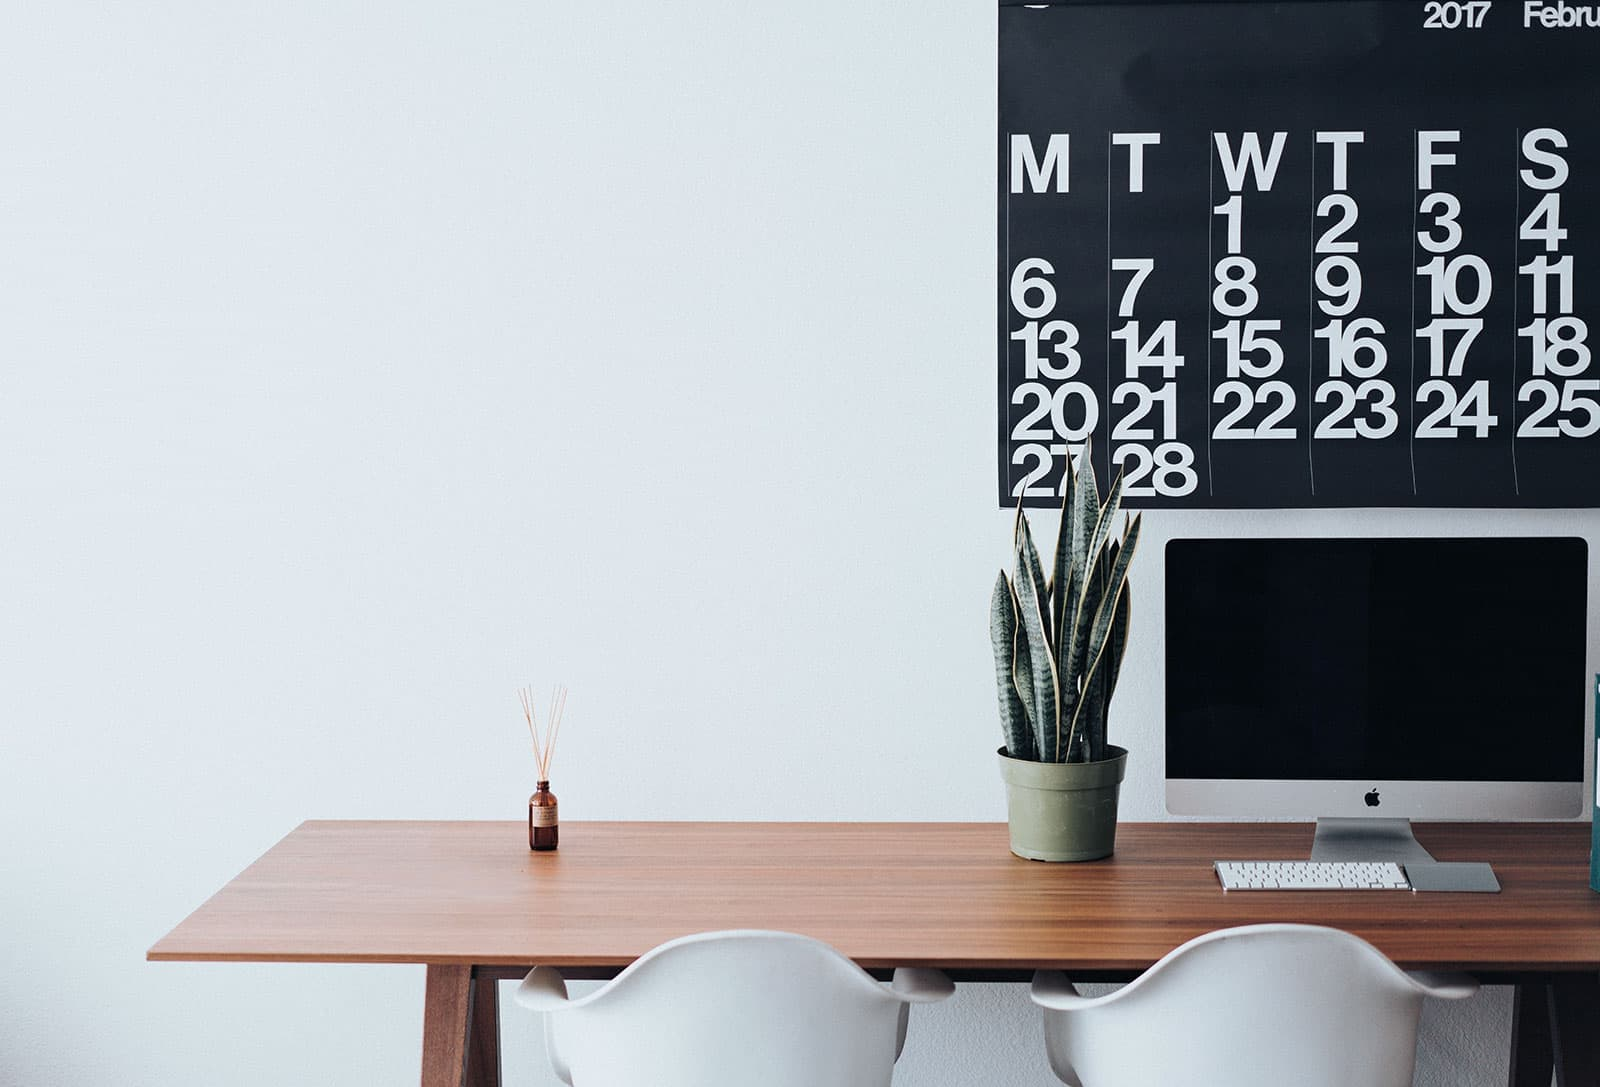

In [3]:
from PIL import Image

# Apro l'immagine
my_img = Image.open('./files_esercizi/img01.jpg')

# Leggo le informazioni che mi servono
dimensioni = my_img.size
larghezza, altezza = dimensioni
filename = my_img.filename
formato = my_img.format
formato_desc = my_img.format_description

# Stampo le informazioni ottenute
print('Dimensioni:', dimensioni)
print('Larghezza:', larghezza)
print('Altezza:', altezza)
print('Nome file:', filename)
print('Formato:', formato)
print('Descrizione formato:', formato_desc)

# Esporto in un altro formato
my_img.save('./files_esercizi/outputs/img01.png')

# Mostro l'immagine qua, in Jupyter Notebook
display(my_img)

- L'attributo `.size` ci restituisce una tupla (larghezza, altezza) che possiamo decomporre comodamente in due variabili, se ne abbiamo la necessità.

- Il metodo save, se non diversamente specificato rileva automaticamente il formato di destinazione sulla base dell'estensione del file, in questo caso `.png`.

### Creare una nuova immagine

Pillow mette a disposizione anche il metodo `Image.new()` che restituisce un oggetto `Image`, in modo simile a `Image.open()`, tuttavia il nuovo oggetto sarà vuoto. Gli argomenti accettati da `Image.new()` sono i seguenti:

- `mode`: La stringa che imposta la modalità colore per la nuova immagine. Noi lavoreremo con 'RGB' o 'RGBA', ma esistono anche altre modalità di cui non ci occuperemo in questa sede.
- `size`: Le dimensioni della nuova immagine, sotto forma di tupla composta da due numeri integer (altezza, larghezza).
- `color`: Il colore di sfondo (*background color*) con cui creare l’immagine, sotto forma di tupla composta da tre (RGB) o quattro (RGBA) numeri interi. Potete usare un valore restituito dalla funzione `ImageColor.getcolor()` oppure scrivere nome standard secondo la convensione [*web color*](https://it.wikipedia.org/wiki/Colori_Web).

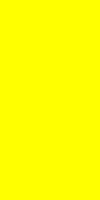

Immagine trasparente:


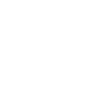

In [4]:
from PIL import Image

# Creo un'immagine rettangolare con lo sfondo giallo
new_img_yellow = Image.new('RGB', (100, 200), 'yellow')
# Salvo l'immagine risultante
new_img_yellow.save('./files_esercizi/outputs/new_yellow_img.jpg')

# Creo un'immagine quadrata trasparente
new_img_transparent = Image.new('RGBA', (100, 100))
# Salvo l'immagine risultante
new_img_transparent.save('./files_esercizi/outputs/new_transparent_img.png')

# Mostro le immagini create, qua in Jupyter Notebook
display(new_img_yellow)
print('Immagine trasparente:')
display(new_img_transparent)

> NOTA: Se omesso, l'argomento `color` di default è il nero:
> - In RGB è semplicemente "nero" `(0, 0, 0)`.
> - In RGBA, è il cosiddetto "nero invisibile" `(0, 0, 0, 0)`. Per questo motivo, nell'esempio precedente, la seconda immagine ha uno sfondo trasparente.

### Ritagliare un'immagine

Ritagliare (*crop*) un’immagine significa selezionare una regione rettangolare all’interno dell’immagine ed eliminare tutto ciò che cade al di fuori di quel rettangolo.

Il metodo `Image.crop()` accetta una tupla che rappresenta un *box* e restituisce un nuovo oggetto `Image`, che rappresenta l’immagine ritagliata. 

> ATTENZIONE: Il ritaglio non avviene “sul posto”: l’oggetto `Image` originale non viene toccato e viene restituito un nuovo oggetto Image.

> NOTA: Ricorda che in una coppia di coordinate *box* (che in questo caso corrispondino alla sezione ritagliata) comprende la colonna di sinistra e la riga superiore di pixel, ma <u>non include la colonna di destra e la riga inferiore di pixel</u>.

(90, 240)


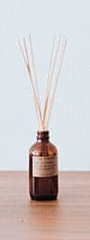

In [5]:
from PIL import Image

# Apro l'immagine
my_img = Image.open('./files_esercizi/img01.jpg')

# Ritaglio l'immagine dando le coodinate di un box
cropped_img = my_img.crop((500, 650, 590, 890))

# Salvo l'immagine risultante
cropped_img.save('./files_esercizi/outputs/cropped_img.jpg')

# Mostro l'immagine ritagliata, qua in Jupyter Notebook
print(cropped_img.size)
display(cropped_img)

### Copiare e incollare immagini

Il metodo `Image.copy()` restituirà un nuovo oggetto `Image` con la stessa immagine dell’oggetto da cui è stato invocato. Questo metodo è utile se dovete modificare un’immagine ma volete conservare anche una copia dell’originale.

Il metodo `Image.paste()` richiede due argomenti:
- l'oggetto `Image` "sorgente";
- una tupla con le coordinate x e y del punto in cui si vuole collocare l’angolo superiore sinistro dell'immagine da incollare all'interno dell'immagine di destinazione.

Vediamo un esempio nel quale compiamo i seguenti passaggi:

1. Creiamo una copia dell'immagine `img1` e la chiamiamo `img1_copy`.
2. Ritagliamo una porzione di `img1` e la chiamiamo `img_ritaglio`.
3. Incolliamo `img_ritaglio` su `img1_copy`.
4. Salviamo `img1_copy` su file.

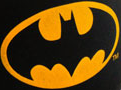

L'immagine ritagliata è grande: (121, 90)


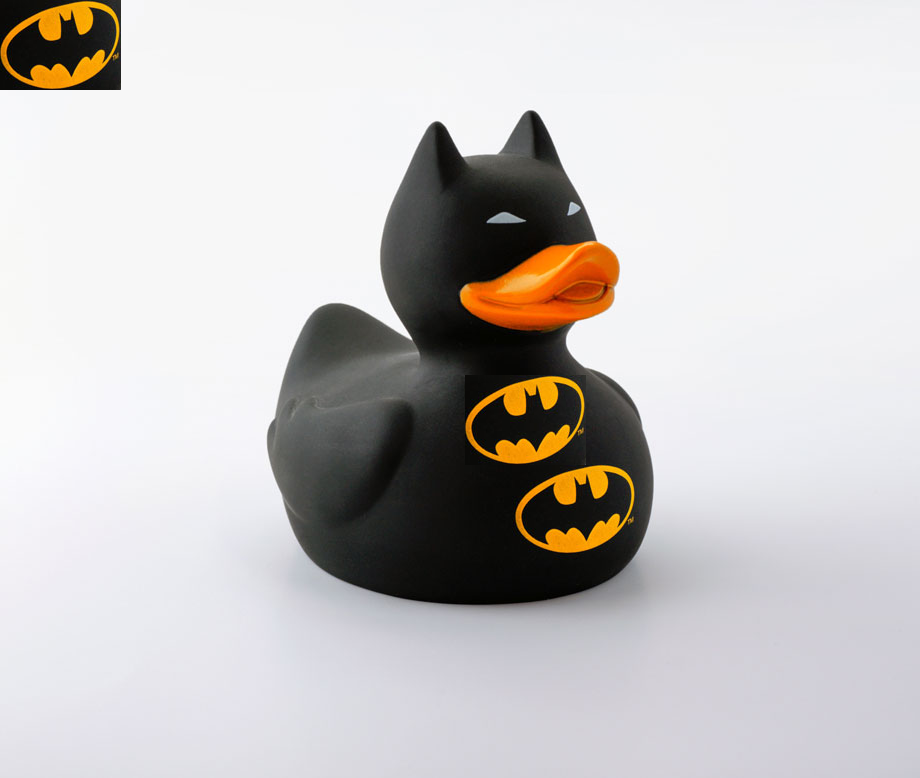

In [6]:
from PIL import Image

# Apro l'immagine originale
img1 = Image.open('./files_esercizi/img04.jpg')

# Creo una copia dell'immagine originale, sulla quale lavorerò
img1_copy = img1.copy()

# Creo una terza immagine come ritaglio di una porzione della prima
img_ritaglio = img1.crop((515, 464, 636, 554))

# Incollo il ritaglio in due posizioni diverse
img1_copy.paste(img_ritaglio, (0, 0))
img1_copy.paste(img_ritaglio, (465, 375))

# Salvo l'immagine risultante
img1_copy.save('./files_esercizi/outputs/collage.jpg')

# Mostro l'immagine ritagliata, qua in Jupyter Notebook
display(img_ritaglio)
# Controllo le dimensioni dell'immagine ritagliata
print("L'immagine ritagliata è grande:", img_ritaglio.size)
# Mostro l'immagine di output, qua in Jupyter Notebook
display(img1_copy)

Notate che il metodo `Image.paste()` modifica il suo oggetto `Image` sul posto: non restituisce un oggetto `Image` con l’immagine incollata, ma modifica l'oggetto originale. È per questo motivo che abbiamo creato una copia dell'immagine originale prima di incollarci sopra il ritaglio.

### Tassellare un'immagine

Supponiamo che vogliate tassellare tutta l’immagine con il logo di Batman. Potete farlo molto semplicemente con un paio di cicli `for`.

0	0
121	0
242	0
363	0
484	0
605	0
726	0
847	0
0	90
121	90
242	90
363	90
484	90
605	90
726	90
847	90
0	180
121	180
242	180
363	180
484	180
605	180
726	180
847	180
0	270
121	270
242	270
363	270
484	270
605	270
726	270
847	270
0	360
121	360
242	360
363	360
484	360
605	360
726	360
847	360
0	450
121	450
242	450
363	450
484	450
605	450
726	450
847	450
0	540
121	540
242	540
363	540
484	540
605	540
726	540
847	540
0	630
121	630
242	630
363	630
484	630
605	630
726	630
847	630
0	720
121	720
242	720
363	720
484	720
605	720
726	720
847	720


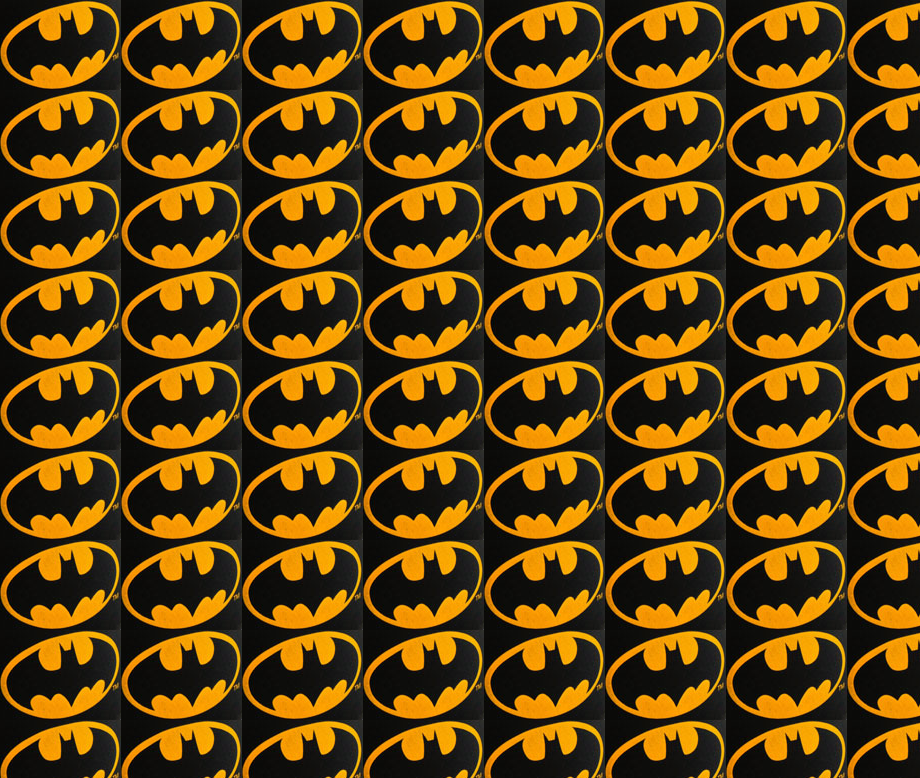

In [7]:
from PIL import Image
from time import sleep
from IPython.display import clear_output

# Apro l'immagine originale
img1 = Image.open('./files_esercizi/img04.jpg')

# Creo una nuova immagine ritagliando una porzione della prima immagine
img2 = img1.crop((515, 464, 636, 554))

# Leggo le dimensioni delle due immagini
img1_W, img1_H = img1.size  # contenitore
img2_W, img2_H = img2.size  # ritaglio

# Per ciascun pixel verticale, partendo da 0 e saltando l'altezza dell'immagine ritagliata
for y in range(0, img1_H, img2_H):
    # Per ciascun pixel orizzontale, partendo da 0 e saltando la larghezza dell'immagine ritagliata
    for x in range(0, img1_W, img2_W):
        # Incolla l'immagine ritagliata
        img1.paste(img2, (x, y))

        # Stampa le coordinate (per debug)
        print(x, y, sep='\t')

        # Mostra la tassellazione in tempo reale
        # display(img1, clear=True)
        # sleep(0.2)

# Salvo l'immagine risultante
img1.save('./files_esercizi/outputs/tassellatura.jpg')

# Mostro l'immagine tassellata, qua in Jupyter Notebook
display(img1)

Usando due cicli `for` annidati, possiamo calcolare i valori di `x` e `y` che ci servono per incollare l'immagine `img2`  sull’oggetto `img1`, creando una specie di griglia. 

- La variabile `y` del ciclo inizia da `0` e procede per incrementi di `img2_H`.
- La variabile `x` del ciclo più interno esterno inizia da `0` e procede per incrementi di `img2_W`.

Abbiamo stampato le coordinate `x` e `y` che via via vengono calcolate, per vedere come operano questi due cicli annidati. Come si può vedere dalla sequenza di coordinate, in pratica abbiamo incollato i ritagli da sinistra a destra e dall'alto verso il basso.

### Centrare l'immagine incollata

Con Pillow si lavora tutto di coordinate, quindi abituiamoci a risolvere i problemi usando un po' di geometria.

Per centrare un'immagine rispetto ad un'altra che funge da "contenitore" dobbiamo eseguire i seguenti calcoli:

<pre>
x = larghezza_contenitore / 2 - larghezza_contenuto / 2
y = altezza_contenitore / 2 - altezza_contenuto / 2
</pre>

![center.jpg](./imgs/graphic/center.jpg)


### Incollare immagini con trasparenza

Normalmente i pixel trasparenti vengono incollati come pixel bianchi. Se l’immagine che volete incollare ha pixel trasparenti, passate a `Image.paste()` nuovamente l’oggetto da incollare come terzo argomento.

Questo terzo argomento è un oggetto “maschera”. Una maschera è un oggetto di tipo `Image` in cui il valore del canale alfa è significativo, mentre vengono ignorati tutti gli altri colori. La maschera dice alla funzione `Image.paste()` quali pixel lasciare trasparenti.

Un uso avanzato delle maschere non potrà essere trattato in questa sede, ma per ora basta sapere che se volete incollare un’immagine che ha pixel trasparenti, dovete passare alla funzione `Image.paste()` l’oggetto `Image` da incollare sia come primo sia come terzo argomento.

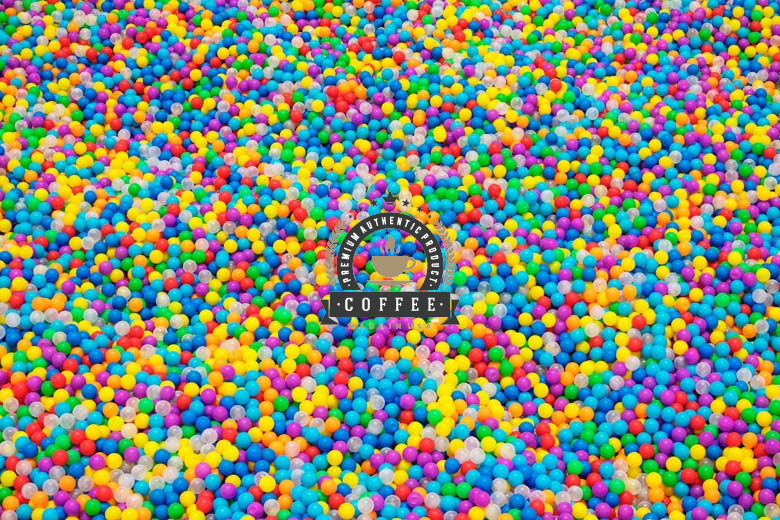

In [8]:
from PIL import Image

# Apro l'immagine originale
img1 = Image.open('./files_esercizi/img06.jpg')  # contenitore
img2 = Image.open('./files_esercizi/img08.png')  # logo

# Converto entrambe le immagini in modalità colore RGBA (con trasparenza)
img1 = img1.convert('RGBA')
img2 = img2.convert('RGBA')

# Calcolo le coodinate per posizionare l'immagine in centro 
img1_W , img1_H = img1.size
img2_W , img2_H = img2.size
center = (int(img1_W/2 - img2_W/2), int(img1_H/2 - img2_H/2))

# Incollo l'immagine al centro
img1.paste(img2, center, img2)

# Salvo l'immagine risultante
img1.save('./files_esercizi/outputs/palline_logo_trasparente.png')

# Mostro l'immagine risultante, qua in Jupyter Notebook
display(img1)

### Ridimensionare un’immagine

Il metodo `Image.resize()` restituisce un nuovo oggetto `Image` della larghezza e altezza specificate con l'argomento `size` che accetta una tupla di due interi i quali rappresentano larghezza e altezza in pixel.

Per "**scalare**" (*scale*) un'immagine, dobbiamo modificare larghezza e altezza in modo <u>proporzionale</u>.

Immagine originale: (1600, 1087)
Immagine scalata: (800, 543)


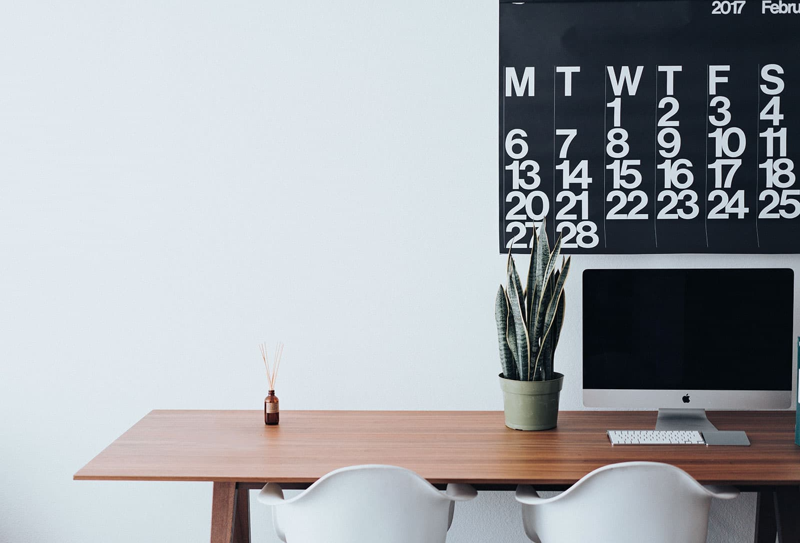

In [9]:
from PIL import Image

# Imposto il fattore di ingrandimento (scale ratio)
ratio = 0.5

# Apro l'immagine da scalare
my_img = Image.open('./files_esercizi/img01.jpg')

# Leggo le dimensioni originali
larghezza, altezza = my_img.size

# Calcolo le nuove dimensioni in base al fattore di ingrandimento
new_size = (int(larghezza * ratio), int(altezza * ratio))
scaled_img = my_img.resize(new_size)

# Salvo l'immagine risultante
scaled_img.save('./files_esercizi/outputs/img01_scaled.jpg')

# Stampo dimensioni dell'immagine originale e di quella scalata
print('Immagine originale:', my_img.size)
print('Immagine scalata:', scaled_img.size)

# Mostro l'immagine risultante, qua in Jupyter Notebook
display(scaled_img)

Il metodo `Image.resize()` accetta come argomento una tupla di numeri integer. Dato che la scrittura di questa tupla è un po' lunga, per facilitare la lettura l'abbiamo messa nella variabile `new_size`.

Questo ridimensionamento che abbiamo appena fatto, mantiene le stesse proporzioni per larghezza e altezza, ma le dimensioni passate a `Image.resize()` non devono per forza essere proporzionali all’immagine originale; in questo caso otterremo un'immagine "schiacciata" (*stretched*):

Immagine originale: (1600, 1087)
Immagine ridimensionata: (200, 400)


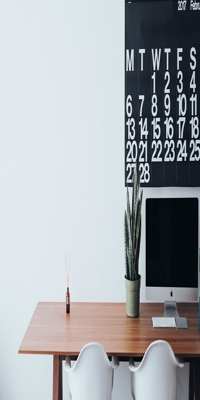

In [10]:
from PIL import Image

# Apro l'immagine da ridimensionare
my_img = Image.open('./files_esercizi/img01.jpg')

# Imposto una dimensione arbitraria
new_size = (200, 400)
# Ottengo una nuova immagine ridimensionata
resized_img = my_img.resize(new_size)

# Salvo l'immagine ridimensionata
resized_img.save('./files_esercizi/outputs/img01_stretched.jpg')

# Stampo dimensioni dell'immagine originale e di quella scalata
print('Immagine originale:', my_img.size)
print('Immagine ridimensionata:', resized_img.size)

# Mostro l'immagine, qua in Jupyter Notebook
display(resized_img)

## Ruotare e ribaltare immagini

Si possono ruotare le immagini con il metodo `Image.rotate()`, che restituisce un nuovo oggetto `Image` dell’immagine ruotata e lascia intatta l'immagine originale. L’argomento di `.rotate()` è un singolo valore intero o in virgola mobile che rappresenta il numero di gradi di cui si deve ruotare l’immagine, <u>in senso antiorario</u>.

Notate che larghezza e altezza dell’immagine cambieranno, quando l’immagine viene ruotata di 90 o 270 gradi. Questp è dovuto all'argomento passato `expand=True`.

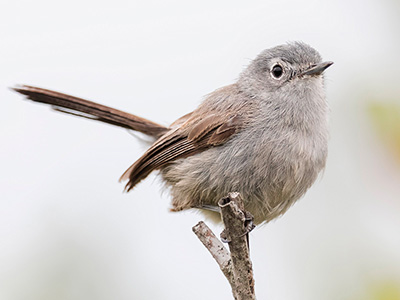

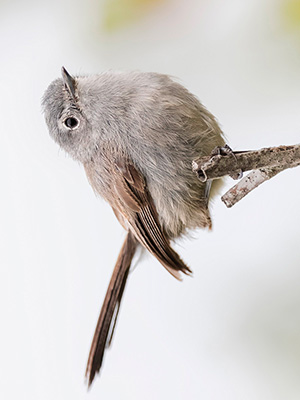

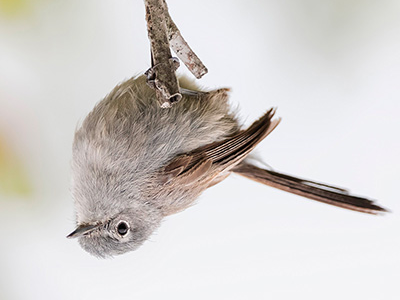

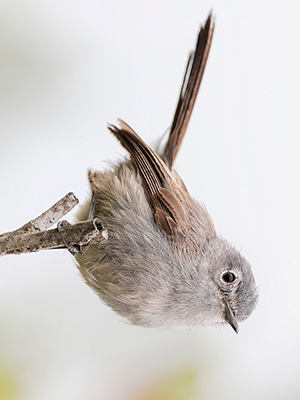

In [11]:
from PIL import Image

# Apro l'immagine da ruotare
my_img = Image.open('./files_esercizi/img15.jpeg')

img_rot90 = my_img.rotate(90, expand=True)
img_rot180 = my_img.rotate(180, expand=True)
img_rot270 = my_img.rotate(270, expand=True)

# Salvo le immagini ridimensionate
img_rot90.save('./files_esercizi/outputs/img_rot90.jpg')
img_rot180.save('./files_esercizi/outputs/img_rot180.jpg')
img_rot270.save('./files_esercizi/outputs/img_rot270.jpg')

# Mostro l'immagine originale e quelle ruotate, qua in Jupyter Notebook
display(my_img, img_rot90, img_rot180, img_rot270)

Puoi anche ruotare un’immagine di un angolo che non è multiplo di 90:

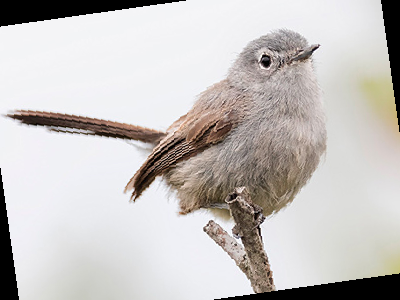

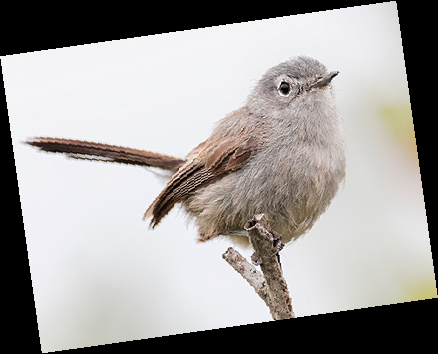

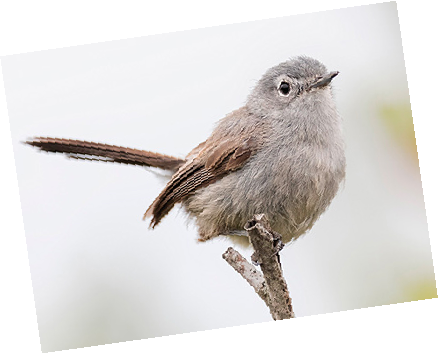

In [12]:
from PIL import Image

# Apro l'immagine da ruotare
my_img = Image.open('./files_esercizi/img15.jpeg')

# Ruoro l'immagine senza espanderla
img_rot8 = my_img.rotate(8)
# Ruoro l'immagine espandendola
img_rot8_exp = my_img.rotate(8, expand=True)

# Converto l'immagine in RGBA (con trasparenza)
my_img_trasp = my_img.convert('RGBA')
# Ruoto l'immagine con trasparenza, espandendola
img_rot8_exp_trasp = my_img_trasp.rotate(8, expand=True)

# Salvo le immagini ruotate
img_rot8.save('./files_esercizi/outputs/img_rot8.jpg')
img_rot8_exp.save('./files_esercizi/outputs/img_rot8_exp.jpg')
img_rot8_exp_trasp.save('./files_esercizi/outputs/img_rot8_exp_trasp.png')

# Mostro le immagini ruotate, qua in Jupyter Notebook
display(img_rot8)
display(img_rot8_exp)
display(img_rot8_exp_trasp)

Passando l'argomento `fillcolor` a `.rotate()` possiamo specificare il colore di sfondo.

> ATTENZIONE: se quando eseguite l'esempio precedente sul vostro sistema, non vi visualizza la trsparenza e vedete lo sfondo nero, potete "forzarla" passando l'argomento `fillcolor=(0,0,0,0)`. Ricorda che in ogni caso l'immagine deve essere in modalità colore "RGBA".

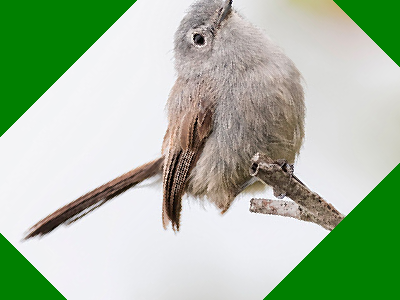

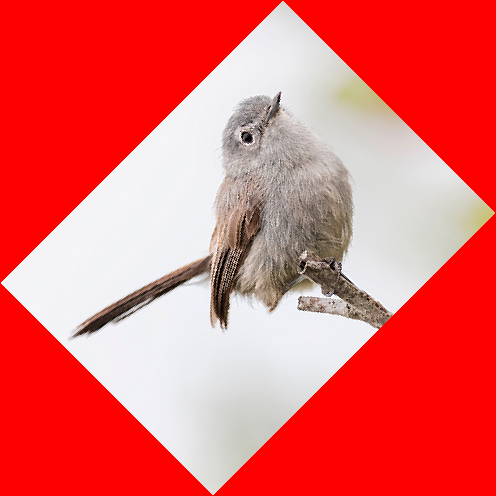

In [13]:
from PIL import Image

# Apro l'immagine da ruotare
my_img = Image.open('./files_esercizi/img15.jpeg')


# Ruoro l'immagine senza espanderla e imposto sfondo verde
img_rot45_green = my_img.rotate(45, fillcolor='green')
# Ruoro l'immagine espandendola e imposto sfondo rosso
img_rot45_exp_red = my_img.rotate(45, expand=True, fillcolor=(255, 0, 0))

# Salvo le immagini ruotate
img_rot45_green.save('./files_esercizi/outputs/img_rot45_green.jpg')
img_rot45_exp_red.save('./files_esercizi/outputs/img_rot45_exp_red.jpg')

# Mostro le immagini ruotate, qua in Jupyter Notebook
display(img_rot45_green)
display(img_rot45_exp_red)

Potete anche ribaltare specularmente un’immagine con il metodo `Image.transpose()` passandogli una delle seguenti costanti o i relativi codici numerici:

- `Image.FLIP_LEFT_RIGHT` &rarr; `0`
- `Image.FLIP_TOP_BOTTOM` &rarr; `1`
- `Image.ROTATE_180` &rarr; `3`
- `Image.ROTATE_270` &rarr; `4`
- `Image.ROTATE_90` &rarr; `2`
- `Image.TRANSPOSE` &rarr; `5`
- `Image.TRANSVERSE` &rarr; `6`

Provatele per vedere cosa fanno!

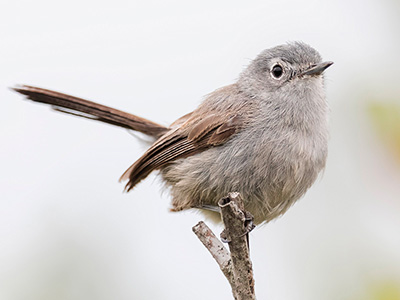

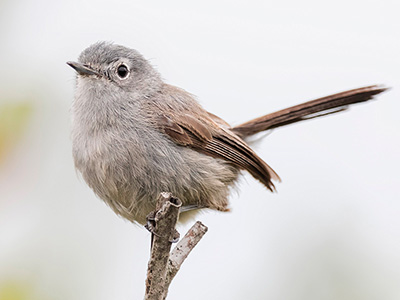

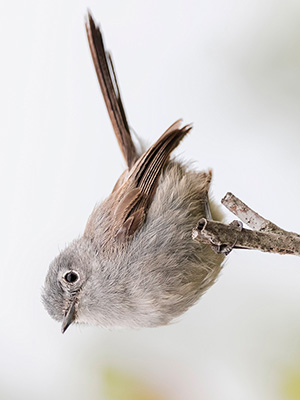

In [14]:
from PIL import Image

# Apro l'immagine da ribaltare specularmente
my_img = Image.open('./files_esercizi/img15.jpeg')

# Creo nuove immagini trasposte
img_flip_y = my_img.transpose(Image.FLIP_LEFT_RIGHT)
img_flip_x = my_img.transpose(Image.TRANSPOSE)

# Salvo le immagini trasposte
img_flip_y.save('./files_esercizi/outputs/img_flip_y.jpg')
img_flip_x.save('./files_esercizi/outputs/img_flip_x.jpg')

# Mostro l'immagine originale e quelle trasposte, qua in Jupyter Notebook
display(my_img)
display(img_flip_y)
display(img_flip_x)

## Modificare singoli pixel

Il colore di un singolo pixel può essere recuperato da un oggetto `Image` tramite i metodi `.getpixel()` e `.putpixel()`. Entrambi questi metodi prendono una tupla che rappresenta le coordinate *x* e *y* del pixel.

Il metodo `Image.putpixel()` prende anche un ulteriore argomento tupla per il colore del pixel, che deve essere una tupla RGB (tre interi) o una RGBA (quattro interi).

Facciamo un esempio:

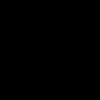

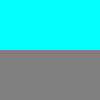

In [15]:
from PIL import Image, ImageColor

# Creo un'immagine quadrata con lo sfondo nero
new_img = Image.new('RGB', (100, 100))

# Mostro l'immagine creata, qua in Jupyter Notebook
display(new_img)

# Coloro tutti i pixel della metà in alto di azzurro
for y in range(50):
    for x in range(100):
        new_img.putpixel((x, y), (0, 255, 255))

# Coloro tutti i pixel della metà in basso di grigio
for y in range(50, 100):
    for x in range(100):
        color = ImageColor.getcolor('gray', 'RGB')
        new_img.putpixel((x, y), color)


# Salvo l'immagine risultante
new_img.save('./files_esercizi/outputs/generated_img.jpg')

# Mostro l'immagine creata e modificata, qua in Jupyter Notebook
display(new_img)

Ovviamente, disegnare un pixel alla volta su un’immagine non è molto pratico. Se dovete disegnare delle forme, usate le funzioni di`ImageDraw`.

## Disegnare sulle immagini

Se avete bisogno di disegnare linee, rettangoli, circonferenze o altre forme semplici su un’immagine, potete usare il modulo `ImageDraw` di Pillow.

Se passiamo un oggetto Image alla funzione `ImageDraw.Draw()` riceveremo un oggetto di tipo `ImageDraw`. Questo oggetto ha vari metodi per il disegno di forme e testo su un oggetto Image. 

Memorizziamo l’oggetto ImageDraw in una variabile draw, in modo da poterlo usare facilmente nell’esempio che segue.

I metodi di `ImageDraw` che vedremo disegnano vari tipi di forme sull’immagine. I parametri `fill` e `outline` per questi metodi sono facoltativi e hanno come valore predefinito il bianco se non vengono specificati.

#### Punti
Il metodo `.point(xy, fill)` disegna singoli pixel. L’argomento `xy` rappresenta una lista dei punti che si vogliono disegnare. La lista può essere una lista di tuple di coordinate *x* e *y*, come `[(x, y), (x, y), ...]`, oppure una lista di coordinate *x* e *y* senza tuple, come `[x1, y1, x2, y2, ...]`.
L’argomento fill è il colore dei punti ed è o una tupla RGBA o una stringa con il nome di un colore, per esempio 'red'. L’argomento fill è facoltativo.

#### Linee
Il metodo `.line(xy, fill, width)` disegna una linea o una serie di linee. L’argomento `xy` è o una lista di tuple, come `[(x, y), (x, y), ...]`, oppure una lista di interi, come [`x1, y1, x2, y2, ...]`. Ciascun punto è uno degli estremi delle linee che si disegnano. L’argomento `fill`, facoltativo, è il colore delle linee, come tupla RGBA o come nome di colore. L’argomento facoltativo `width` è lo spessore delle linee ed è uguale a 1 come valore predefinito, se non viene specificato.

#### Rettangoli
Il metodo `.rectangle(xy, fill, outline)` disegna un rettangolo. L’argomento `xy `è una tupla di *box*, nella forma *`(left, top, right, bottom)`*. I valori *left* e *top* specificano le coordinate *x* e *y* del vertice superiore sinistro del rettangolo, mentre *right* e *bottom* specificano il vertice inferiore destro. L’argomento facoltativo `fill` è il colore di riempimento del rettangolo, mentre l’argomento facoltativo `outline` è il colore del bordo del rettangolo.

#### Ellissi
Il metodo `.ellipse(xy, fill, outline)` disegna un’ellisse. Se la larghezza e l’altezza dell’ellisse sono identiche, il metodo disegna un cerchio. L’argomento `xy` è una tupla di box *`(left, top, right, bottom)`* che rappresenta un riquadro in cui l’ellisse si inscrive esattamente. L’argomento facoltativo `fill` è il colore di riempimento dell’ellisse, l’argomento facoltativo `outline` è il colore del bordo dell’ellisse.

##### Poligoni
Il metodo `.polygon(xy, fill, outline)` disegna un poligono arbitrario. L’argomento `xy` è una lista di tuple, come *`[(x, y), (x, y), ...]`*, oppure una lista di interi, come *`[x1, y1, x2, y2, ...]`*. che rappresentano i vertici del poligono. L’ultima coppia di coordinate viene automaticamente collegata alla prima. L’argomento facoltativo `fill` è il colore di riempimento del poligono, l’argomento facoltativo `outline` è il colore del bordo del poligono.

Ora proviamo ad applicare questi metodi disegnando alcune forme in un'immagine grande 200x200 pixel:

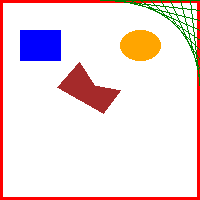

In [16]:
from PIL import Image, ImageDraw

# Creo un'immagine quadrata con lo sfondo bianco
new_img = Image.new('RGBA', (200, 200), 'white')

# Creo un oggetto ImageDraw per poter disegnare forme
drawing = ImageDraw.Draw(new_img)
# Disegno una linea chiusa attorno all'immagine (un bordo)
drawing.line(
    [
        (0, 0),
        (199, 0),
        (199, 199),
        (0, 199),
        (0, 0),
    ],
    fill='red',
    width=5
)

# Disegno un rettangolo blu
drawing.rectangle((20, 30, 60, 60), fill='blue')
# Disegno un ellisse arancione
drawing.ellipse((120, 30, 160, 60), fill='orange')
# Disegno un'poligono marrone
drawing.polygon(
    [
        (57, 87),
        (79, 62),
        (94, 85),
        (120, 90),
        (103, 113)
    ],
    fill='brown'
)

# Disegno un reticolo di linee verdi
for i in range(100, 200, 10):
    drawing.line(
        [
            (i, 0),
            (200, i - 100)
        ],
        fill='green'
    )


# Mostro l'immagine finale, qua in Jupyter Notebook
display(new_img)

Esistono vari altri metodi di disegno e altre figure in `ImageDraw`. Leggi la La [documentazione completa su questi strumenti](http://pillow.readthedocs.io/en/latest/reference/ImageDraw.html).

## Disegnare testo

L’oggetto `ImageDraw` ha anche un metodo `.text()` per disegnare del testo su un’immagine. Questo metodo prende quattro argomenti: `xy`, `text`, `fill` e `font`.

- `xy` è una tupla di due interi che specifica il vertice superiore sinistro del riquadro di testo.
- `text` è la stringa di testo che si vuole scrivere.
- `fill` (facoltativo) è il colore del testo.
- `font` (facoltativo) è un oggetto `ImageFont`, utilizzato per stabilire il tipo di carattere e il corpo del testo.

`.text()` prende facoltativamente un oggetto `ImageFont` come ultimo argomento. Per creare uno di questi oggetti, bisogna prima importare `ImageFont` da PIL.

#### Oggetto font

Importato il modulo `ImageFont` di Pillow, potete chiamare la funzione `ImageFont.truetype()`, i cui primi due argomenti sono `font` e `size` e che restituisce un nuovo oggetto font.

Il primo argomento, `font`, è una stringa che indica il nome o il percorso del file TrueType del font (che è un file che si trova sul vostro disco fisso, solitamente con estensione `.ttf`).

Non dovete per forza inserire il percorso al file `TrueType`, perché Python cerca automaticamente i caratteri nelle dyrectory si sistema, ma visualizzerà un errore se non riesce a trovare la font che avete specificato. Quindi se avete intenzione di eseguire i vostri script su più piattaforme (Linux, macOS e Windows) avete le seguenti opzioni:

- Usare i cosiddetti "web safe fonts", font che sono installati su quasi tutti i sistemi operativi moderni. Non esiste una vera e propria lista ufficiale, ma puoi consultare [questa lista su *cssfontstack.com*](https://www.cssfontstack.com/).

- Allegare il file del font nel vostro progetto e passare il suo percorso, compreso di nome del file e estensione, come primo parametro di `ImageFont.truetype()`.

Il secondo argomento per `ImageFont.truetype()` è `size`, un intero che indica la dimensione dei caratteri in punti. I punti sono un concetto un po' diverso dai pixel, perché sono relativi alla risoluzione. Pillow crea immagini PNG che per default sono a risoluzione di 72 dpi (o ppi), e dunque un punto è un 1/72-esimo di pollice.

#### Area occupata dal testo
Poiché spesso è difficile sapere in anticipo quali saranno le dimensioni di un blocco di testo in un dato tipo di carattere, un oggetto `ImageDraw` ha anche un metodo `.textbbox()`. Il suo primo argomento è la coordinata in cui si vuole posizionare il testo, laseconda e la stringa di testo che si vuole "misurare", il terzo argomento è un oggetto `ImageFont` (facoltativo se si usa il font di default). Il metodo `.textbbox()` restituirà allora una tupla box che rappresentano l'area che dovrebbe occupare il testo con il tipo di carattere indicato se venisse scritto sull’immagine. Potete usare quei valori per calcolare esattamente dove volete inserire il testo.

(100, 158, 188, 183)


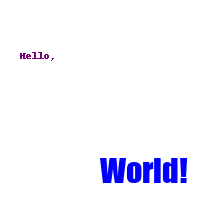

In [17]:
from PIL import Image, ImageDraw, ImageFont
import os

# Creo un'immagine quadrata con lo sfondo bianco
new_img = Image.new('RGB', (200, 200), 'white')

# Creo un oggetto ImageDraw per poter disegnare forme
drawing = ImageDraw.Draw(new_img)

# Disegno la scritta "Hello," con il carattere di default, in viola
drawing.text((20, 50), 'Hello,', fill='purple')

# Creo un oggetto FreeTypeFont impostando il nome del font e la dimensione
my_font = ImageFont.truetype('Impact', 32)

# Ottengo le dimensioni del box che occuperà il testo e le stampo
print(drawing.textbbox((100, 150), 'World!', my_font))

# Disegno la scritta "World!" con il carattere di custom, in blu
drawing.text((100, 150), 'World!', fill='blue', font=my_font)

# Mostro l'immagine finale, qua in Jupyter Notebook
display(new_img)

## Applicazioni pratiche

L'abilità di creare e modificare immagini in modo massivo può avere molte applicazioni. Ad sesmpio:

- Aggiungere testo (logo, copyright, watermark, timestamp) alle immagini;
- Copiare o spostare immagini in cartelle diverse a seconda delle loro caratteristiche;
- Ritagliare, ridimensionare e comprimere immagini.
- Creare opere di "arte generativa".

## Sbizzarrirsi con matematica e la geometria

Ecco alcuni script che generano immagini casuali. Prova a leggerli, eseguirli e cercare di capire come vengono generate le immagini. Sono quasi tutti strumenti che a questo punto dovresti conoscere. Se ci sono funzioni o metodi che non capisci cosa fanno, prova a cercare i dettegli sulla [documentazione ufficiale](https://pillow.readthedocs.io/en/stable).

Prova anche in modo empirico a modificare dei parametri e vedere cosa succede.

Buon divertimento!

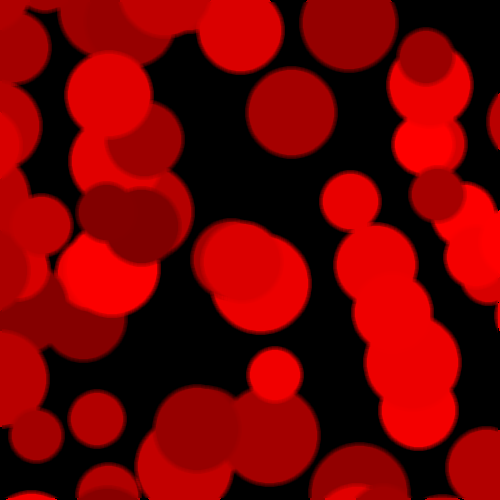

In [18]:
# from https://alexwlchan.net/2022/circle-experiments/

import random
from PIL import Image, ImageDraw, ImageFilter

im = Image.new('RGB', size=(500, 500))
draw = ImageDraw.Draw(im)

circle_count = 0

while (0, 0, 0) in im.getdata():
    x = random.randint(-100, 600)
    y = random.randint(-100, 600)
    r = random.randint(50, 100)
    draw.ellipse(
        (x, y, x + r, y + r),
        fill=(
            random.randint(128, 255),
            0,
            0,
        )
    )

    circle_count += 1
    if circle_count >= 100:
        break


im = im.filter(ImageFilter.BLUR)

im.save('./files_esercizi/outputs/random_circles.png')

display(im)

Processing run_id: ee31ba38-f7ba-11ed-b6e6-acde48001122


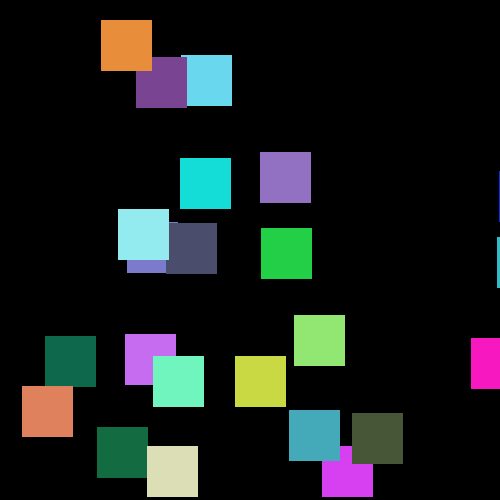

In [22]:
# from https://hamy.xyz/labs/generative-art-in-python-with-pil

import random
import uuid

from PIL import Image, ImageDraw

run_id = uuid.uuid1()

print(f'Processing run_id: {run_id}')

image = Image.new('RGB', (500, 500))
width, height = image.size

rectangle_width = 50
rectangle_height = 50

number_of_squares = random.randint(10, 550)

draw_image = ImageDraw.Draw(image)
for i in range(number_of_squares):
    rectangle_x = random.randint(0, width)
    rectangle_y = random.randint(0, height)

    rectangle_shape = [
        (rectangle_x, rectangle_y),
        (rectangle_x + rectangle_width, rectangle_y + rectangle_height)]
    draw_image.rectangle(
        rectangle_shape,
        fill=(
            random.randint(0, 255),
            random.randint(0, 255),
            random.randint(0, 255)
        )
    )

display(image)

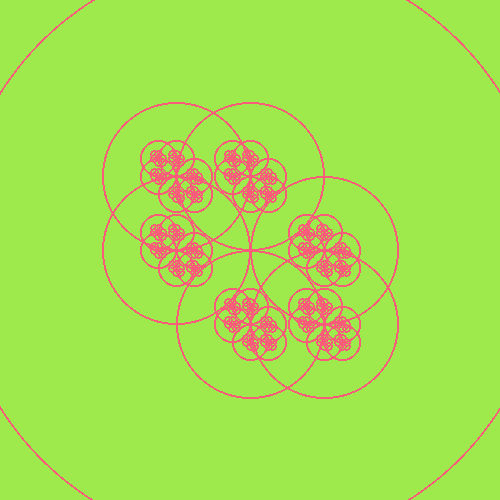

In [20]:
# from https://gist.github.com/pkisztelinski/6061ae3544eb7342e9d5c557603670d3

from PIL import ImageDraw, Image
import random
from time import time

IMAGE_WIDTH = 500
IMAGE_HEIGHT = 500
DEFAULT_RADIUS = 100
DEFAULT_LINE_WIDTH = 1

LOOPS = 20


class FunctionTypes:
    CIRCLE_ONE = 0
    CIRCLE_MANY = 1
    FUNC_TYPES = (CIRCLE_ONE, CIRCLE_MANY)


def random_hex() -> str:
    def r(): return random.randint(0, 255)
    return '#%02X%02X%02X' % (r(), r(), r())


class Circle:
    def __init__(
            self, x: int, y: int, radius: float,
            outline_color: str, line_width: int = DEFAULT_LINE_WIDTH) -> None:
        self.x = x
        self.y = y
        self.radius = radius
        self.outline_color = outline_color
        self.line_width = line_width

    def draw(self):
        image_draw.ellipse(
            xy=(
                (self.x - self.radius, self.y - self.radius),
                (self.x + self.radius, self.y + self.radius)
            ),
            outline=self.outline_color,
            width=self.line_width
        )


def draw_circle_one(
        x: int, y: int, radius: float, radius_min: int, radius_change: float,
        circle_line_width: int, circle_line_color: str):

    Circle(
        x=x, y=y, radius=radius, line_width=circle_line_width,
        outline_color=circle_line_color).draw()

    if radius > radius_min:
        radius = radius * radius_change
        draw_circle_one(
            x=x, y=y, radius=radius, radius_min=radius_min, radius_change=radius_change,
            circle_line_width=circle_line_width, circle_line_color=circle_line_color)


def draw_circle_many(
        x: int, y: int, radius: float, circle_line_width: int, circle_line_color: str,
        radius_div: int, radius_max: int, axis: int):

    Circle(
        x=x, y=y, radius=radius, line_width=circle_line_width,
        outline_color=circle_line_color).draw()

    new_radius = int(radius / radius_div)

    circle_params_x = (
        (x + new_radius, y, new_radius),
        (x - new_radius, y, new_radius),
    )

    circle_params_y = (
        (x, y + new_radius, new_radius),
        (x, y - new_radius, new_radius),
    )

    circle_params_x_y = (
        (x + new_radius, y + new_radius, new_radius),
        (x - new_radius, y - new_radius, new_radius),
    )

    circle_params = [*circle_params_x, *circle_params_y, *circle_params_x_y]

    if radius > radius_max:
        for x, y, radius in circle_params[:axis]:
            draw_circle_many(
                x=x, y=y, radius=radius, circle_line_width=circle_line_width,
                circle_line_color=circle_line_color, radius_div=radius_div,
                radius_max=radius_max, axis=axis)


for img in range(LOOPS):
    image = Image.new('RGBA', (IMAGE_WIDTH, IMAGE_HEIGHT), random_hex())
    image_draw = ImageDraw.Draw(image)

    func_type = random.choice(FunctionTypes.FUNC_TYPES)
    label = str(time()).replace('.', '_')

    if func_type == FunctionTypes.CIRCLE_ONE:
        draw_circle_one(
            x=int(IMAGE_WIDTH/2),
            y=int(IMAGE_HEIGHT/2),
            radius=random.randint(int(IMAGE_WIDTH/2), IMAGE_WIDTH),
            radius_min=random.randint(1, 100),
            radius_change=random.uniform(0.5, 0.99),
            circle_line_width=random.randint(1, 100),
            circle_line_color=random_hex()
        )
    elif func_type == FunctionTypes.CIRCLE_MANY:
        draw_circle_many(
            x=int(IMAGE_WIDTH / 2),
            y=int(IMAGE_HEIGHT / 2),
            radius=random.randint(int(IMAGE_WIDTH/2), IMAGE_WIDTH),
            circle_line_width=random.randint(1, 4),
            circle_line_color=random_hex(),
            radius_div=random.choice([2, 4]),
            radius_max=random.randint(7, 20),
            axis=random.choice([2, 4, 6])
        )

display(image)